# Desafios Aula 5

## Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

Com 10000 iterações o resultado não é muito diferente do resultado da aula com 1000 iterações. 

In [85]:
modelo_rlogistica = LogisticRegression()
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6653369724963258

In [86]:
modelo_rlogistica = LogisticRegression(solver='newton-cg')
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6640772622296872

Outra opção de algoritmo é o dos K vizinhos mais próximos

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
n_neighbors = 3

In [89]:
clf = KNeighborsClassifier(n_neighbors)
clf.fit(x_treino, y_treino)
clf.score(x_teste, y_teste)

0.6155784169640982

## Desafio 02: Estude a documentação do Sklearn.

https://scikit-learn.org/stable/index.html

## Desafio 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Desafio 04: Teste outros problemas (perguntas). 0, 1 ou +

In [90]:
x = dados_combinados.loc[:,'g-0':'c-99']

Neste exemplo estamos fazendo a classificação da coluna tempo. Vamos fazer um map para para que os valores 24,48,72 que são muito mais altos que os valores nas labels não tornem o modelo tendencioso.

In [91]:
y=dados_combinados['tempo'].map({24:0,48:1,72:2})

In [92]:
y

0        0
1        2
2        1
3        1
4        2
        ..
23809    0
23810    0
23811    1
23812    0
23813    2
Name: tempo, Length: 23814, dtype: int64

In [93]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

In [94]:
modelo_rlogistica2 = LogisticRegression(solver='newton-cg')
modelo_rlogistica2.fit(x_treino, y_treino)
modelo_rlogistica2.score(x_teste, y_teste)

0.686122191895864

In [95]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.3464203233256351

## Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever está label.

A droga mais utilizada é a mais presente na base de dados. Desta forma, a base de dados é altamente desbalanceada. O algoritmo de machine learning pode simplesmente "achar" que é melhor classificar o resultado como sendo a droga mais frequente. Por isso, decidimos criar um algoritmo que diferencia as drogas 8b87a7a83 e 5628cb3ee que possuem um número de elementos semelhante.

In [96]:
dados_combinados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
7a2ea4684       1
c5ffd58ca       1
cf21e6ee0       1
b2fe3eca7       1
0dedfb162       1
Name: composto, Length: 3289, dtype: int64

In [97]:
dt_temporario = dados_combinados.query('composto in ["8b87a7a83", "5628cb3ee"]')

Aqui modificamos o x. Se colocamos mais colunas de g e c o algoritmo consegue 100% de taxa de acerto. A diferença da ativação entre as duas drogas é muito grande e fácil do algoritmo identificar.

In [98]:
x = dt_temporario.loc[:,'g-0':'g-10'] #

In [99]:
y = dt_temporario['composto'].map({'8b87a7a83': 0, '5628cb3ee': 1})

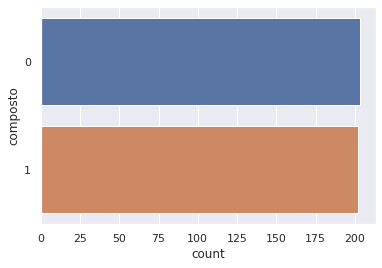

In [100]:
sns.countplot(y=y)

In [104]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y,random_state=376) 

In [105]:
modelo_rlogistica2 = LogisticRegression()
modelo_rlogistica2.fit(x_treino, y_treino)
modelo_rlogistica2.score(x_teste, y_teste)

0.9382716049382716

In [106]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.5061728395061729

## Desafio 06: Resumo do que você aprendeu com os dados

O estudo sobre a base de dados é livre. Tente extrair o máximo de informações da base de dados com o que aprendeu nesta aula e compartilhe no Discord e nas redes sociais como forma de construção do seu portfólio em Data Science.